# Regression Trees and Model Optimization - Lab

## Introduction

In this final lab, we shall see how to apply regression analysis using CART trees for regression, with some hyper parameter tuning as we saw in the case of classification. For a comparison of predictive capabilities and computational cost, we shall work the "Boston Housing" dataset. This will allow us to compare different regression approaches in terms of their accuracy and cost involved. 

## Objectives
You will be able to:
- Apply predictive regression analysis with CART trees
- Get the data ready for modeling
- Tune the key hyper parameters based a various models developed during training 
- Study the impact of tree pruning on the quality of predictions

## Boston Housing Dataset - Again ! 

The dataset is available in the repo as `boston.csv`. 

- Load the Dataset and print its head and dimensions

In [12]:
import pandas as pd

df = pd.read_csv('boston.csv')
print(f'The Boston Housing Dataset has {df.shape[0]} data points with {df.shape[1]} variables each.')
df.head()

The Boston Housing Dataset has 506 data points with 15 variables each.


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Identify Features and Target Data
In this lab, we shall use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point:

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

#### Target
- `MEDV`' has been multiplicatively scaled to account for 35 years of market inflation.


- Create dataframes for features and target as shown above. 
- Inspect the contents for validity 

In [16]:
X = df[['rm', 'lstat', 'ptratio']]
y = df['medv']
X.describe()

,rm,lstat,ptratio
count,506.000000,506.000000,506.000000
mean,6.284634,12.653063,18.455534
std,0.702617,7.141062,2.164946
min,3.561000,1.730000,12.600000
25%,5.885500,6.950000,17.400000
50%,6.208500,11.360000,19.050000
75%,6.623500,16.955000,20.200000
max,8.780000,37.970000,22.000000


In [17]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

## Inspect Correlations 

- Use scatter plots to show the correlation between chosen features and target variable
- Comment on each scatter plot 

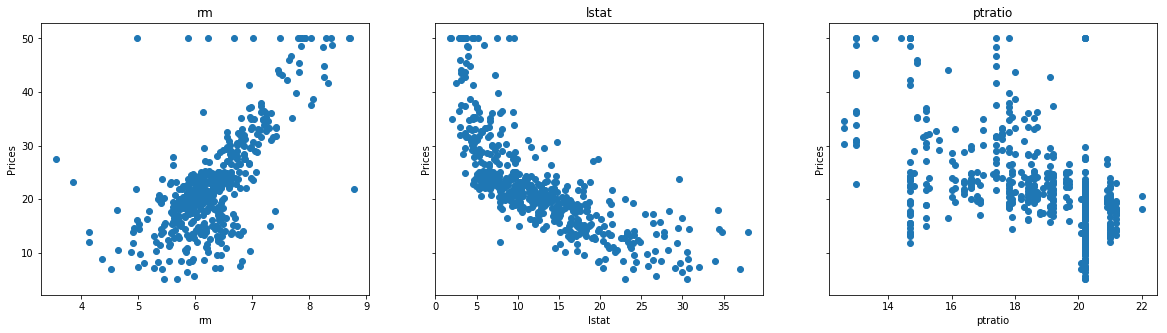

In [30]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
for i in range(3):
    axs[i].scatter(X[X.columns[i]], y)
    axs[i].set_xlabel(X.columns[i])
    axs[i].set_ylabel('Prices')
    axs[i].set_title(X.columns[i])
plt.show()

RM has a strong, positive correlation with Price, while LSTAT has a strong, negative correlation. PTRATIO appears to have a weak, slightly negative relationship with price.

## Create Evaluation Metrics

- Create a function `performance(true, predicted)` to calculate and return the r-sqaured score and MSE for two equal sized arrays showing true and predicted values
- TEst the function with given data 

In [33]:
# Evaluation Metrics
# Import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    
    return [r2_score(y_true, y_predict), mse(y_true, y_predict)]

# Calculate the performance - TEST
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.4719999999999998]

[0.9228556485355649, 0.4719999999999998]

## Supervised Training 
- For supervised learning, split the `features` and `target` datasets into training/test data (80/20). 
- For reproducibility, use `random_state=42`

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Grow a Vanilla Regression Tree

- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above.
- Use `random_state=45` for tree instance
- Record your observations

In [36]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=45)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
scores = performance(y_test, y_pred)

print(f'R-Squared: {scores[0]}\nMean Squared Error: {scores[1]}')

R-Squared: 0.47097115950374013
Mean Squared Error: 38.795686274509805


Given an R-Squared value of less than .5, this is not a very strong predictor of price.

## Hyperparameter Tuning 

- Find the best tree depth for a depth range: 1-30
- Run the regressor repeatedly in a for loop for each depth value. 
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures, for all runs.
- Comment on the output 

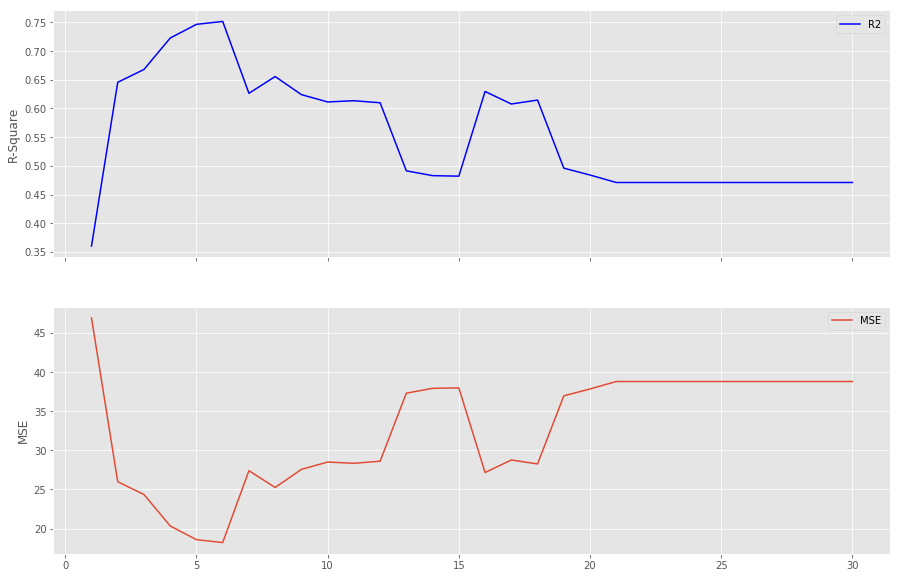

In [46]:
import numpy as np
plt.style.use('ggplot')

r_squares, MSE = [], []
for i in range(1, 31, 1):
    reg = DecisionTreeRegressor(random_state=45, max_depth=i)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    scores = performance(y_test, y_pred)
    r_squares.append(scores[0])
    MSE.append(scores[1])

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10))    
axs[0].plot(np.arange(1, 31, 1), r_squares, color='b', label='R2')
axs[0].set_ylabel('R-Square')
axs[0].legend()

axs[1].plot(np.arange(1, 31, 1), MSE, label='MSE')
axs[1].set_ylabel('MSE')
axs[1].legend()

Best results appear to take place at a max depth of 1.

## More Hyperparameter Tuning 

- Repeat the above process for `min_samples_split` parameter

- Use a a range of values from 2-10 for this parameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above

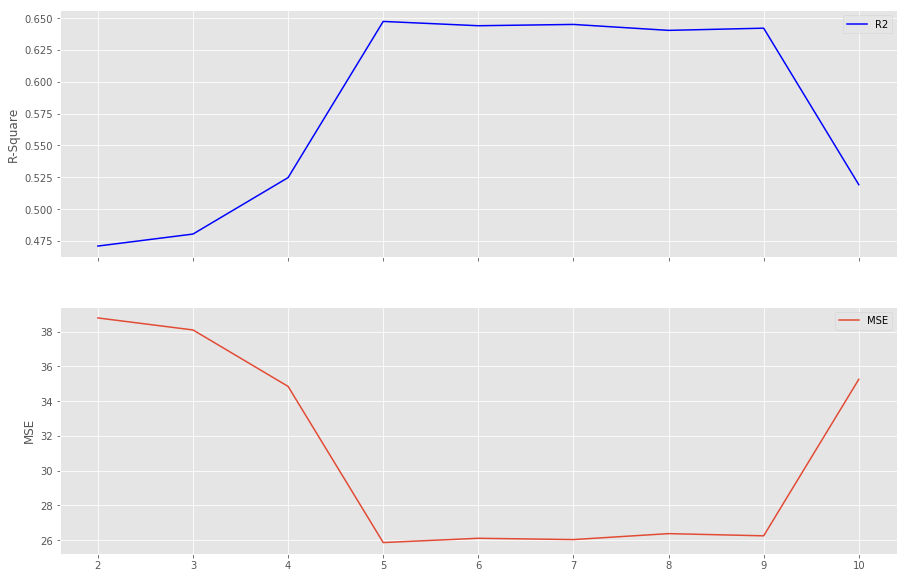

In [48]:
r_squares, MSE = [], []
for i in range(2, 11, 1):
    reg = DecisionTreeRegressor(random_state=45, min_samples_split=i)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    scores = performance(y_test, y_pred)
    r_squares.append(scores[0])
    MSE.append(scores[1])

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10))    
axs[0].plot(np.arange(2, 11, 1), r_squares, color='b', label='R2')
axs[0].set_ylabel('R-Square')
axs[0].legend()

axs[1].plot(np.arange(2, 11, 1), MSE, label='MSE')
axs[1].set_ylabel('MSE')
axs[1].legend()

Optimal split level appears to be at a minimum of 5 sample splits.

# Run the "Optimized" Model 

- Use the best values for max_depth and min_samples_split found in previous runs and run an optimized model with these values. 
- Calculate the performance and comment on the output 

In [55]:
# Create function to build optimized decision tree

def build_dec_tree(X, y, measure = 'MSE', test_size=.2, random_state=10):
    """
    This function takes in a set of independent variables (X) and a target variable (y), then iterates through 10,000 different hyperparameter combinations to find the optimal decision tree.
    
    The function will optionally take in the following parameters to tune how the decision tree is optimized:
    
       crit: Default is 'entropy' for Information Gain, but may also be set to 'gini' for Gini Impurity
       
       measure: Will optimize decision tree to maximize the given measurement type. Default is 'AUC'
          'AUC': Area Under Curve using ROC Curve
          'Accuracy': Overall Accuracy Score
          'F1': F-Measure
          'Precision': Minimize false positives
          'Recall': Minimize false negatives
    """
    from sklearn.metrics import mean_absolute_error as mae
    from sklearn.metrics import mean_squared_error as mse
    from sklearn.metrics import r2_score
    from sklearn.externals.six import StringIO  
    from IPython.display import Image  
    from sklearn.tree import export_graphviz
    import pydotplus
 
    import warnings
    warnings.simplefilter('ignore')
    
    print(f'Building Decision Tree Using {measure} Scoring Optimization\n')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create empty dictionary for hyperparameters & scores associated with top result
    top_score = {'Measure': measure,
                 'Max Depth': 0, 
                 'Min Samples Split': 0, 
                 'Min Samples Leaf': 0, 
                 'Max Features':0, 
                 'Mean Absolute Error': 0, 
                 'Mean Squared Error': 0, 
                 'RMSE': 0, 
                 'R2': 0}
    
    # Iterate through 10,000 possible hyperparameter combinations.
    total_iterations = 0
    for i in np.arange(1, 11, 1): # max_depth
        for j in np.arange(0.05, 1, .1): # min_samples_split
            for k in np.arange(1, 11, 1): # min_samples_leaf
                for l in np.arange(1, len(X.columns), 1): # max_features
                    if total_iterations % 1000 == 0:
                        print(f'  {total_iterations/30:.0f}% Complete')
                    total_iterations += 1
                    clf = DecisionTreeRegressor(random_state=random_state, 
                                                 max_depth=i, 
                                                 min_samples_split=j, 
                                                 min_samples_leaf=k, 
                                                 max_features=l)
                    
                    clf.fit(X_train, y_train)
    
                    y_pred = clf.predict(X_test)
    
                    MAE = mae(y_test, y_pred)
                    MSE = mse(y_test, y_pred)
                    RMSE = np.sqrt(MSE)
                    r_sq = r2_score(y_test, y_pred)

                    # Optimize decision tree based on results of selected criteria. AUC is default. 
                    if ((measure == 'MAE' and MAE < top_score['Mean Absolute Error']) or 
                        (measure == 'MSE' and MSE < top_score['Mean Squared Error']) or 
                        (measure == 'RMSE' and RMSE < top_score['RMSE']) or 
                        (total_iterations == 1)):
                            top_score['Max Depth'] = i
                            top_score['Min Samples Split'] = j
                            top_score['Min Samples Leaf'] = k
                            top_score['Max Features'] = l
                            top_score['Mean Absolute Error'] = MAE
                            top_score['Mean Squared Error'] = MSE
                            top_score['RMSE'] = RMSE
                            top_score['R2'] = r_sq

                            # Create decision tree visualization
                            dot_data = StringIO()
                            export_graphviz(clf, 
                                            out_file=dot_data, 
                                            filled=True, 
                                            rounded=True, 
                                            special_characters=True, 
                                            feature_names=X.columns)
                            graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    print(f'  {total_iterations/30:.0f}% Complete\n')
    
    # Display Results
    for key in list(top_score.keys())[1:]:
        if type(top_score[key]) == np.float64:
            print(f'{key}: {top_score[key]:.4f}')
        else:
            print(f'{key}: {top_score[key]}')
    
    return top_score, Image(graph.create_png())

Building Decision Tree Using MSE Scoring Optimization

  0% Complete
  33% Complete
  67% Complete

Max Depth: 5
Min Samples Split: 0.0500
Min Samples Leaf: 1
Max Features: 1
Mean Absolute Error: 2.8977
Mean Squared Error: 13.3143
RMSE: 3.6489
R2: 0.8768


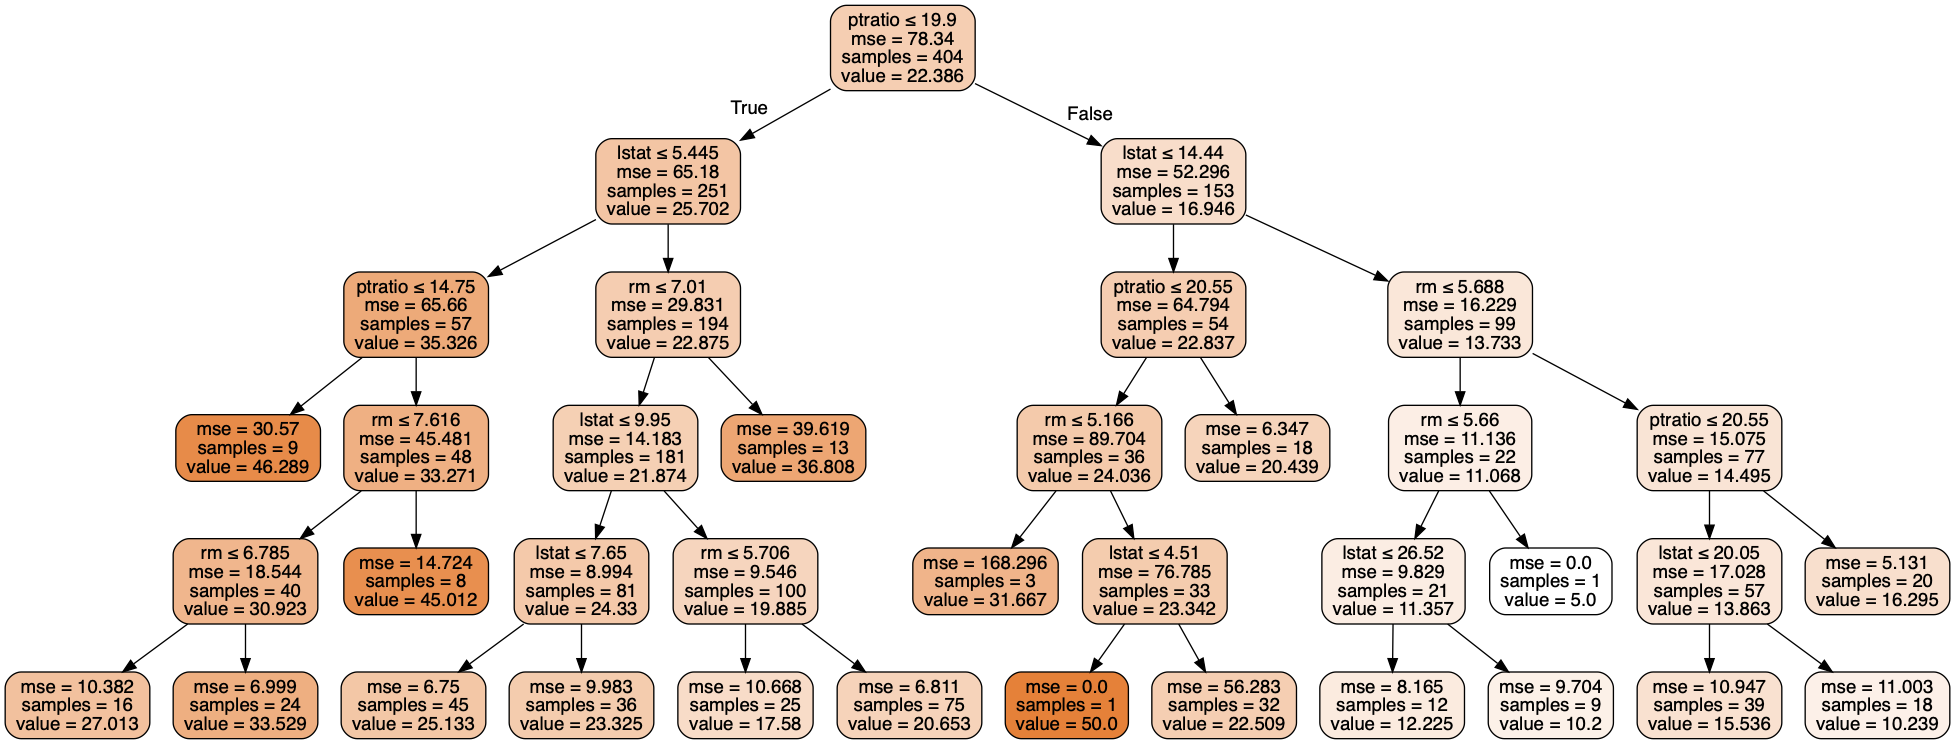

In [56]:
top_score, tree = build_dec_tree(X, y, random_state=45)
tree

## Visualize the tree
- Visualize the trained model as we did in previous sections
- Show the labels for each variable being split in a node
- Interpret the tree

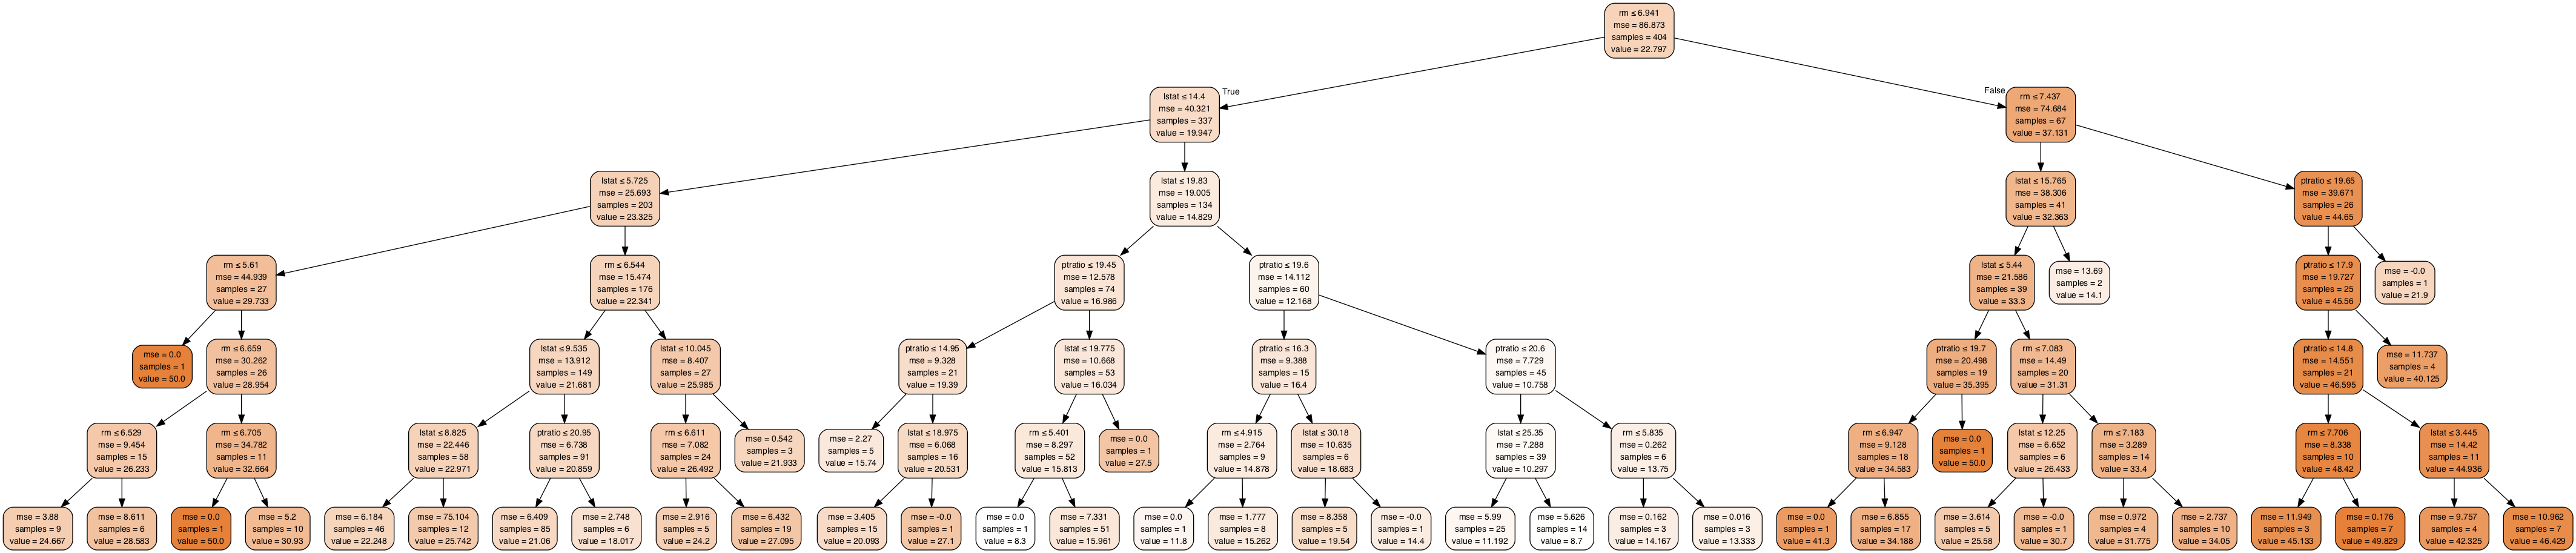

In [38]:
# Your code here 

In [39]:
#Your observations here 



## Level Up - Optional 

- How about bringing in some more features from the original dataset which may be good predictors
- Also , Tune more more hyper parameters like max-features to find the optimal model 


## Summary 

In this lab, we looked at applying a decision tree based regression analysis on the Boston Housing Dataset. We saw how to train various models to find the optimal values for pruning and limiting the growth of the trees. We also looked at how to extract some rules from visualizing trees , that might be used for decision making later. In the next section we shall look at running "Grid Searches" for identifying the best model while tuning all required hyper-parameters - at once. 